In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Import our dataset

In [5]:
# Loading the data from CSV file.
dataFrame = pd.read_csv('Engineering_graduate_salary.csv')

Dataset preparing and preprocessing

In [6]:
# Dropping Unnecessary columns.
dataFrame.drop(['ID', 'DOB', 'CollegeID', '12graduation', '10board', '12board', 'CollegeState',
                'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'CollegeTier'], axis=1, inplace=True)

# Removing duplicated rows.
dataFrame = dataFrame.drop_duplicates()

# How many missing values per column before fixing?
dataFrame.isnull().sum()

# Fixing missing data for column 'collegeGPA' by mean.
dataFrame = dataFrame.fillna(value=dataFrame['collegeGPA'].mean())

# How many missing values per column after fixing?
dataFrame.isnull().sum()

# Fixing missing data for column 'collegeGPA' by filling data like this 1,2,3,nan,5 -> 1,2,3,4,5 in oreder.
# dataframe2 = dataFrame['collegeGPA'].interpolate(method='linear')

# Fixing missing data for column 'collegeGPA' by filling data with previous value, and you can use the next value to fill.
# dataframe3 = dataFrame.fillna(method='pad')

# Splitting the dataset into X(Features) and Y(Dependent Variable).
features = dataFrame.iloc[:,:-1]
dependentVariable = dataFrame.iloc[:,-1]

#**Data Analysis And Visualisation**

In [7]:
numerical_columns = dataFrame.select_dtypes(include=["int64", "float64"]).columns

# Iterate through the numerical columns and calculate the correlation with 'Salary'
for column in numerical_columns:
    correlation = dataFrame[column].corr(dataFrame['Salary'])
    print(f"Correlation between {column:<25} and Salary: {correlation:<20}")

Correlation between 10percentage              and Salary: 0.18141431530718619 
Correlation between 12percentage              and Salary: 0.17275487901927725 
Correlation between collegeGPA                and Salary: 0.13377453856208407 
Correlation between English                   and Salary: 0.17966784038643965 
Correlation between Logical                   and Salary: 0.19364718772538528 
Correlation between Quant                     and Salary: 0.23934504918295857 
Correlation between Domain                    and Salary: 0.13284490830626766 
Correlation between ComputerProgramming       and Salary: 0.13423469396676097 
Correlation between ElectronicsAndSemicon     and Salary: -0.008085355279740055
Correlation between ComputerScience           and Salary: -0.09937305489114863
Correlation between MechanicalEngg            and Salary: 0.03233258075584628 
Correlation between ElectricalEngg            and Salary: -0.0414032367841152 
Correlation between TelecomEngg               and S

In [8]:
for column in dataFrame.columns:
  print(column)

Gender
10percentage
12percentage
Degree
Specialization
collegeGPA
English
Logical
Quant
Domain
ComputerProgramming
ElectronicsAndSemicon
ComputerScience
MechanicalEngg
ElectricalEngg
TelecomEngg
CivilEngg
conscientiousness
agreeableness
extraversion
nueroticism
openess_to_experience
Salary


**Gender**

In [9]:
dataFrame['Gender'].value_counts()


Gender
m    2282
f     716
Name: count, dtype: int64

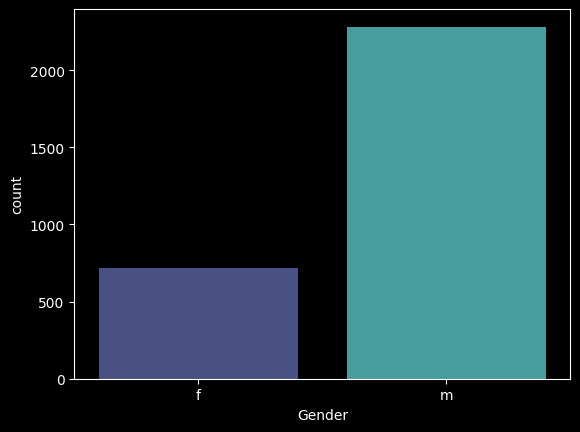

In [10]:
sns.countplot(x= 'Gender',hue='Gender', data=dataFrame, palette='mako')
plt.show()

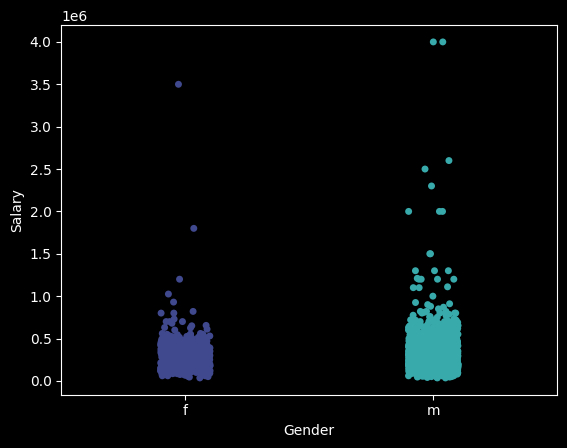

In [11]:
sns.stripplot(x='Gender', y='Salary', data=dataFrame, hue='Gender', palette='mako')
plt.show()

**10percentage**

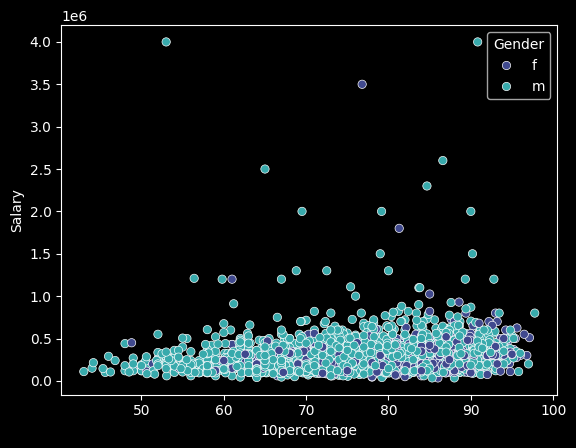

In [12]:
sns.scatterplot(x='10percentage', y='Salary', data=dataFrame, hue='Gender', palette='mako')
plt.show()
# The relationship between salaries and 10pecentage

recommendation:
almost there is no relation between 10percentage and salary

**relation between 10percentage and 12percentage**

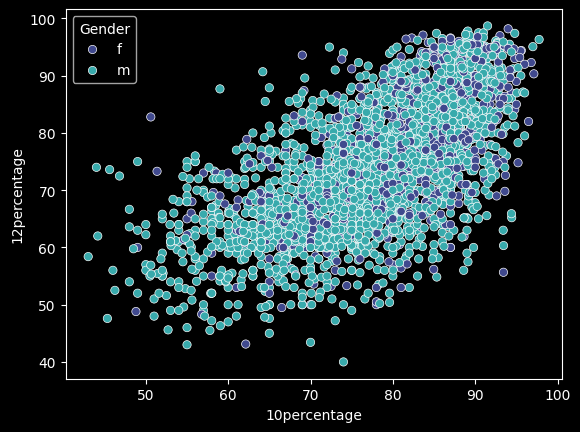

In [13]:
sns.scatterplot(x='10percentage', y='12percentage', data=dataFrame, hue='Gender', palette='mako')
plt.show()

recommandation :

10 Percentage can be dropped as 12 Percentage is related to it


**Specialization**

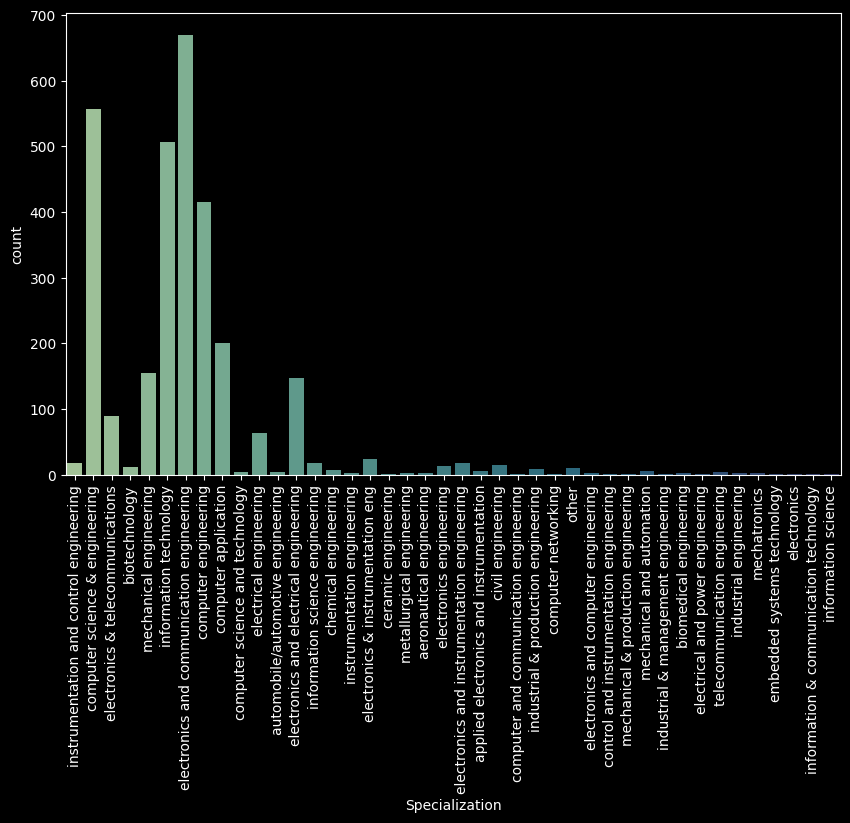

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization',data=dataFrame, palette='crest',hue='Specialization', legend=False)
plt.xticks(rotation=90)
plt.show()

In [15]:
dataFrame.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
information science engineering                 18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and a

recommendation:
remove specialization less than 10

**Degree**

In [16]:
dataFrame.Degree.value_counts()

Degree
B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: count, dtype: int64

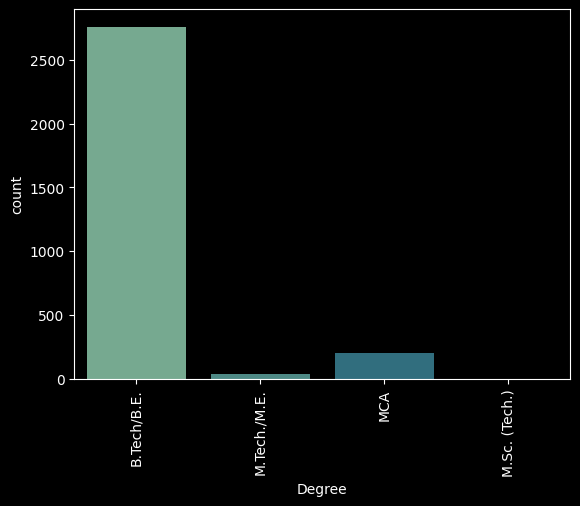

In [17]:
sns.countplot(x='Degree',data=dataFrame, palette='crest',hue='Degree', legend=False)
plt.xticks(rotation=90)
plt.show()

recommendation : remove M.Sc. (Tech.)

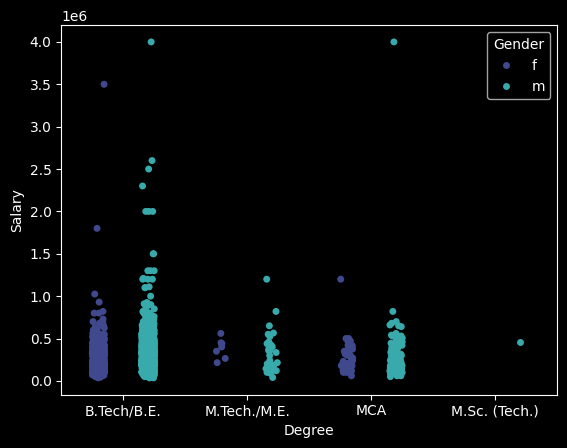

In [18]:
sns.stripplot(x='Degree', y='Salary', data=dataFrame, hue='Gender',dodge=True, palette='mako')
plt.show()

There is no proof of there is a strong relation between degree and salary

**College GPA**

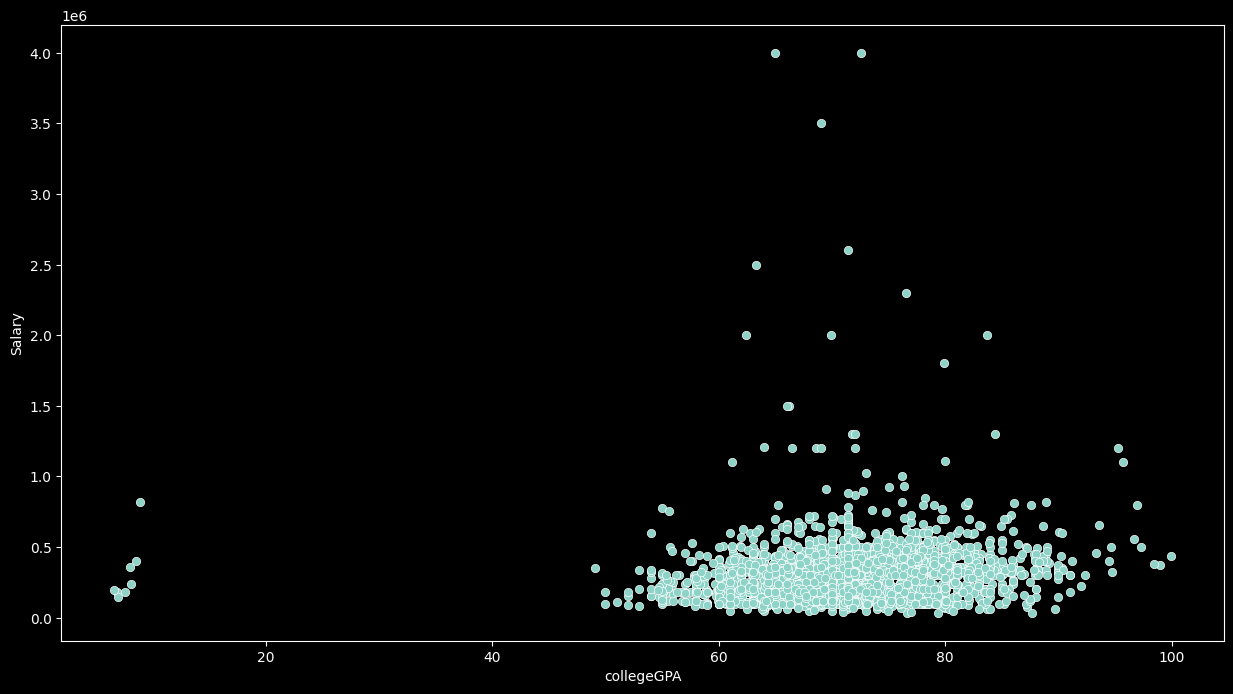

In [19]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='collegeGPA', y='Salary', data=dataFrame)
plt.show()

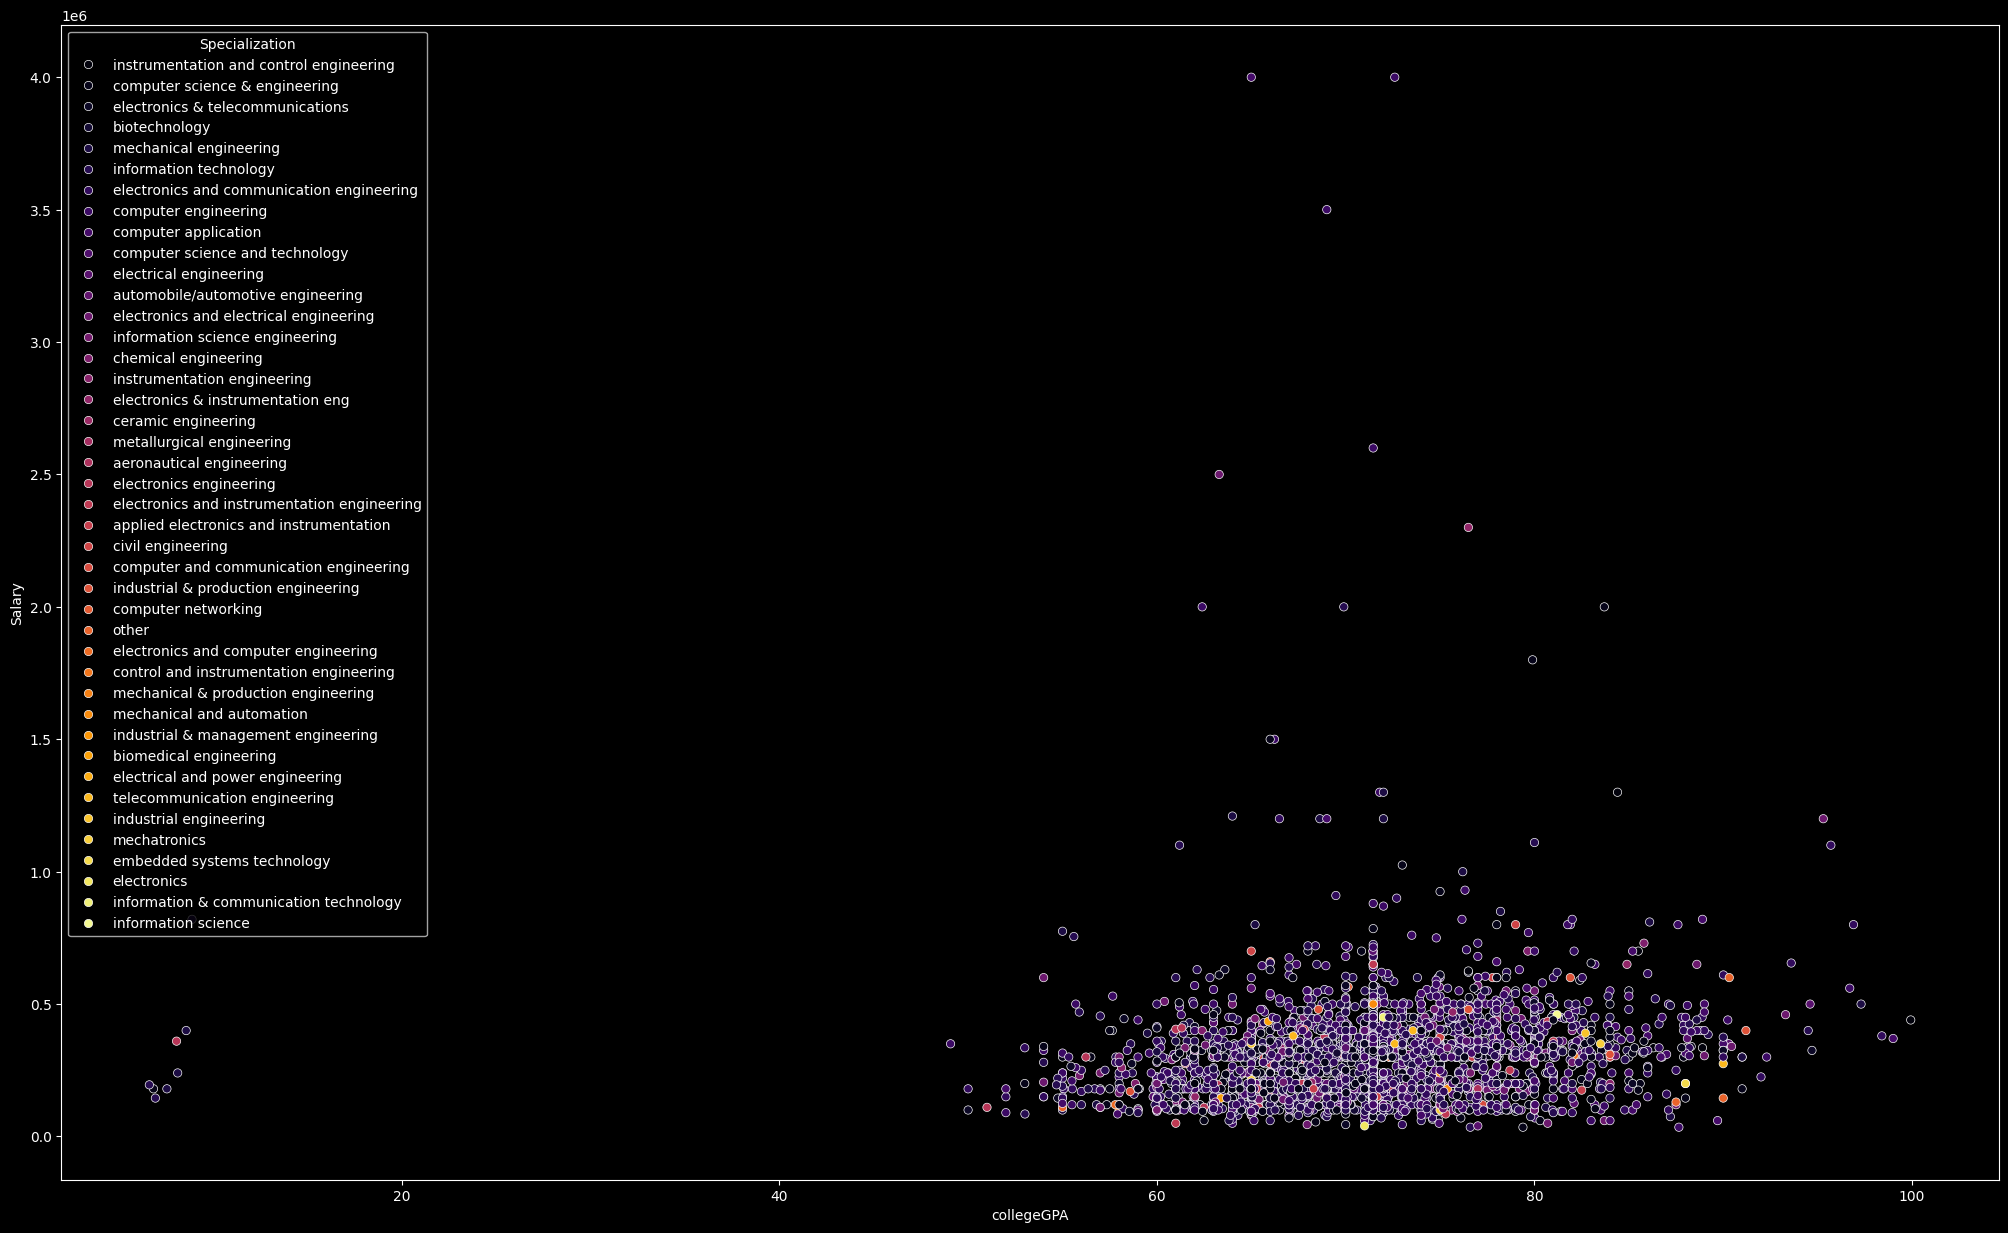

In [20]:
# recommendation : run the code after performing specialization recommendation

plt.figure(figsize=(25, 15))
sns.scatterplot(x='collegeGPA', y='Salary', hue='Specialization',data = dataFrame, palette='inferno')
plt.show()

**English, Logical**

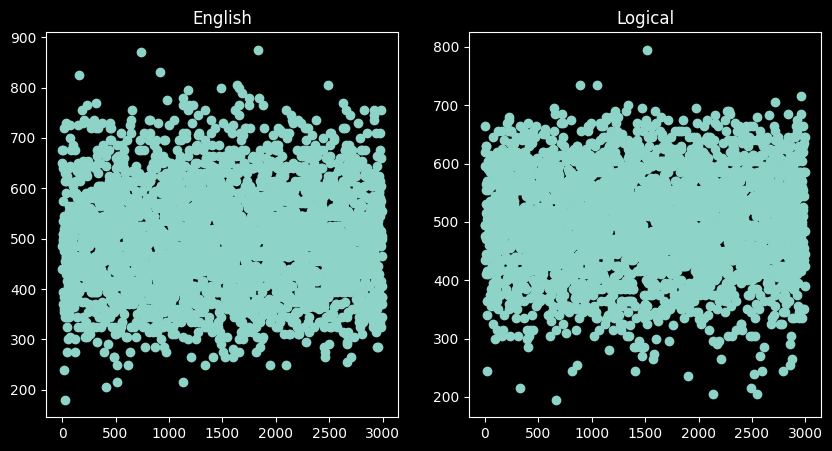

In [21]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(dataFrame.index, dataFrame.English)
plt.title('English')

plt.subplot(1,2,2)
plt.scatter(dataFrame.index, dataFrame.Logical)
plt.title('Logical')

plt.show()

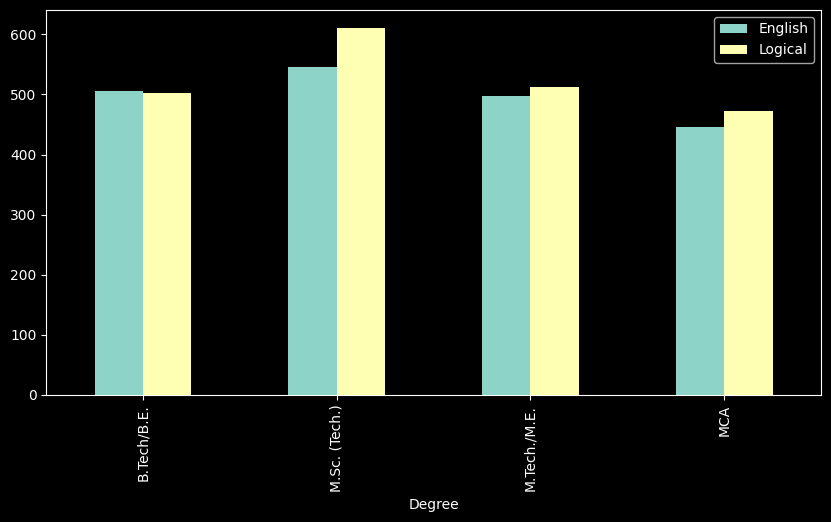

In [22]:
dataFrame.groupby('Degree')[['English', 'Logical']].mean().plot(kind='bar', figsize=(10, 5))
plt.show()

**(Compurter Programming) and (Electronics And Semicon)**

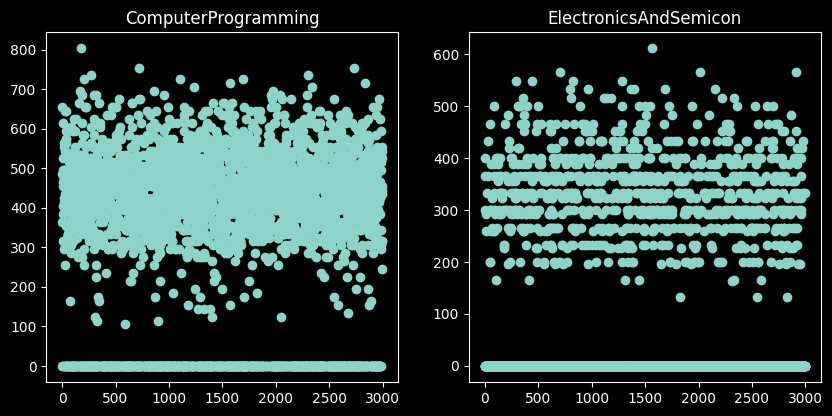

In [23]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.scatter(dataFrame.index, dataFrame.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,2)
plt.scatter(dataFrame.index, dataFrame.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()


#**Encoding Categorical Data**

In [24]:
# Encoding Categorical Values using LabelEncoder technique.
labelEncoder = LabelEncoder()

for column in features.columns:
    if (features[column].dtype == 'object'):
        features[column] = labelEncoder.fit_transform(features[column])
    else:
        features[column] = features[column]

# Encoding Categorical Values using OneHotEncoder technique.
# features = pd.get_dummies(features).astype(np.int8)

In [25]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   Degree                 2998 non-null   object 
 4   Specialization         2998 non-null   object 
 5   collegeGPA             2998 non-null   float64
 6   English                2998 non-null   int64  
 7   Logical                2998 non-null   int64  
 8   Quant                  2998 non-null   int64  
 9   Domain                 2998 non-null   float64
 10  ComputerProgramming    2998 non-null   int64  
 11  ElectronicsAndSemicon  2998 non-null   int64  
 12  ComputerScience        2998 non-null   int64  
 13  MechanicalEngg         2998 non-null   int64  
 14  ElectricalEngg         2998 non-null   int64  
 15  Tele

In [26]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   Degree                 2998 non-null   int64  
 4   Specialization         2998 non-null   int64  
 5   collegeGPA             2998 non-null   float64
 6   English                2998 non-null   int64  
 7   Logical                2998 non-null   int64  
 8   Quant                  2998 non-null   int64  
 9   Domain                 2998 non-null   float64
 10  ComputerProgramming    2998 non-null   int64  
 11  ElectronicsAndSemicon  2998 non-null   int64  
 12  ComputerScience        2998 non-null   int64  
 13  MechanicalEngg         2998 non-null   int64  
 14  ElectricalEngg         2998 non-null   int64  
 15  Tele

#**Scaling Dataset**

In [27]:
standardScalar = StandardScaler()
features = standardScalar.fit_transform(features)

#**Train - Test Splitting**

In [28]:
# Splitting the features and the dependent variable to two portions, one for training the model and another for test and evaluate it.
featuresTrain, featuresTest, dependentVariableTrain, dependentVariableTest = train_test_split(features, dependentVariable , test_size=0.2, random_state=100)

In [29]:
featuresTrain

array([[ 0.56014271, -0.73654419,  0.9137015 , ...,  1.29684876,
         2.16588841,  1.56878295],
       [ 0.56014271, -2.42635556, -0.75020034, ...,  1.1371662 ,
         1.28964495, -0.33416104],
       [ 0.56014271,  0.01337209, -1.39777295, ..., -0.27296485,
         0.43769222, -0.30228311],
       ...,
       [ 0.56014271,  1.46321024,  1.17452936, ..., -1.10233758,
         0.66973776,  0.3252455 ],
       [ 0.56014271, -1.26648504, -0.57031906, ..., -0.77902455,
        -1.46429128,  0.04648734],
       [-1.78525932, -0.96651852, -1.27185605, ...,  0.17907082,
         1.53995791,  1.37850841]])

In [30]:
featuresTest

array([[-1.78525932, -1.66644039, -1.91942866, ...,  0.10395665,
         0.32166945,  0.63905945],
       [-1.78525932,  1.2342358 ,  0.76350064, ...,  0.33875339,
        -0.83836078,  0.42703642],
       [ 0.56014271,  1.17524239,  0.61689739, ..., -1.57743736,
         0.28819564, -1.09525919],
       ...,
       [ 0.56014271, -2.96629528, -0.96605788, ...,  0.40555618,
        -0.25854315, -0.92981171],
       [-1.78525932,  0.1333587 , -0.12061586, ...,  1.29684876,
        -1.08877248,  1.18823387],
       [-1.78525932,  0.63330288, -0.30049714, ...,  0.70715571,
         1.01780607, -0.26305636]])

In [31]:
dependentVariableTrain

2974    150000
54      240000
1971    300000
1607    325000
1111    145000
         ...  
1930    450000
79      120000
1859    290000
2840    240000
1544    275000
Name: Salary, Length: 2398, dtype: int64

In [32]:
dependentVariableTest

1271    1200000
699      200000
356      560000
2776     335000
561      200000
         ...   
1809     200000
2384     170000
1396     180000
1267     100000
2694     200000
Name: Salary, Length: 600, dtype: int64

#**Linear Regression Model**

In [33]:
# Initialize the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(featuresTrain, dependentVariableTrain)

# Making predictions on the testing set
predections = model.predict(featuresTest)

#**Evaluating Linear Regression Model**

In [34]:
rSquaredScore = r2_score(dependentVariableTest, predections)
print("The accuracy of our model is {}%".format(round(rSquaredScore, 2) * 100))

# This accuracy is acceptable in the cases of finance, economics and salaries, but in the cases of science and chemistry, the desired accuracy is between 0.7 and 0.99

The accuracy of our model is 20.0%
